# Fraud Detection of Medicare associated Healthcare Providers

Medicare is an U.S Federal government program which provides hospitalization insurance and voluntary medical insurance for ederly person over 65 years. Healthcare provider Fraud is one of the biggest problems for Medicare. Government report claims, the total Medicare spending is increasing exponentially due to frauds in Medicare claims. In general,  healthcare fraud is an organized crime in which providers, physicians and beneficiaries act together to make fraud claims.


**Project Objectives**

Succinct, rigorous analysis of Medicare data has yielded many physicians who indulge in fraud. They adopt ways in which an ambiguous diagnosis code is used to adopt costliest procedures and drugs. Insurance companies are impacted badly due to these bad practices. Due to this reason, insurance companies increased their insurance premiums and as a result healthcare is becoming costlier day by day.

Healthcare fraud and abuse take many forms. Some of the most common types of frauds by providers are:

a) Billing for services that were not provided.

b) Duplicate submission of a claim for the same service.

c) Misrepresenting the service provided.

d) Charging for a more complex or expensive service than was actually provided.

e) Billing for a covered service when the service actually provided was not covered.

**Problem Statement:**<br>
The goal of this project is to "predict the potentially fraudulent providers " based on the claims filed by them. Along with this, we will also discover important variables helpful in detecting the behaviour of potentially fraud providers. Further, we will study fraudulent patterns in the provider's claims to understand the future behaviour of providers.

**Introduction to the Dataset:**
For this project, we have taken the data available in Kaggle at the following link:
https://www.kaggle.com/rohitrox/healthcare-provider-fraud-detection-analysis
We are considering Inpatient claims, Outpatient claims and Beneficiary details of each provider. Let's see their details: <br>

**A. Beneficiary Details Data**<br>
This data contains beneficiary KYC (Know your Customer) details like health conditions,region they belong to etc as follows:

BeneID: Beneficiary ID<br>
DOB: Date of Birth<br>
DOD:Date of Death/Date of Discharge/Dead or dies of Disease<br>
Gender: Gender of Beneficiary<br>
Race: Race of Beneficiary<br>
RenalDiseaseIndicator: Have Renal diseases (yes or no)<br>
State: Serial number of State of USA<br>
County: Serial number of County in USA<br>
NoOfMonths_PartACov: No. of Months Beneficiary is covered as inpatient<br>
NoOfMonths_PartBCov: No. of months Benefeciary covered as outpatient<br>
ChronicCond_Alzheimer:Chronic Alzheimer condition<br>
ChronicCond_Heartfailure: Chronic Alzheimer condition<br>
ChronicCond_KidneyDisease: Chronic KidneyDisease condition <br>
ChronicCond_Cancer: Chronic Cancer condition<br>
ChronicCond_ObstrPulmonary: Chronic ObstrPulmonary condition<br>
ChronicCond_Depression: Chronic Depression condition<br>
ChronicCond_Diabetes: Chronic Diabetes condition<br>
ChronicCond_IschemicHeart:Chronic IschemicHeart condition<br>
ChronicCond_Osteoporasis:ChronicCond_Osteoporasis<br> 
ChronicCond_rheumatoidarthritis: Chronic rheumatoidarthritis condition<br>
ChronicCond_stroke:Chronic stroke condition<br>
IPAnnualReimbursementAmt: Inpatient Annual Reimbursement Amount<br>
IPAnnualDeductibleAmt: Inpatient Annual Deductible Amount<br> 
OPAnnualReimbursementAmt: Annual Reimbursement Amount<br>
OPAnnualDeductibleAmt: Annual DeductibleAmt Amount<br>

For details how medicare covers follow the link:<br>
https://www.medicare.gov/Pubs/pdf/11435-are-you-an-inpatient-or-outpatient.pdf

**B. Inpatient Data**<br>
This dataset provides insights about the claims filed for those patients who are admitted in the hospitals. It also provides additional details like their admission and discharge dates and admit diagnosis code. 

**C. Outpatient Data**<br>
This data provides details about the claims filed for those patients who visit hospitals and not admitted in it.It also includes Claims details, Providers, Physicians, Diagnosis codes and Procedure codes.


**D: Train:** This dataset contains whether Provider is Fradulant or not.

## Import Python Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Part-I

## Import datasets

In [2]:
Beneficiary = pd.read_csv('Train_Beneficiarydata-1542865627584.csv')
Inpatient = pd.read_csv('Train_Inpatientdata-1542865627584.csv')
Outpatient = pd.read_csv('Train_Outpatientdata-1542865627584.csv')
Train = pd.read_csv('Train-1542865627584.csv')

In [3]:
Beneficiary.shape, Inpatient.shape, Outpatient.shape, Train.shape  

((138556, 25), (40474, 30), (517737, 27), (5410, 2))

In [4]:
Beneficiary.head(3)

,BeneID,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,...,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
0,BENE11001,1943-01-01,NaN,1,1,0,39,230,12,12,...,1,1,1,2,1,1,36000,3204,60,70
1,BENE11002,1936-09-01,NaN,2,1,0,39,280,12,12,...,2,2,2,2,2,2,0,0,30,50
2,BENE11003,1936-08-01,NaN,1,1,0,52,590,12,12,...,2,2,1,2,2,2,0,0,90,40


In [5]:
Beneficiary.columns

Index(['BeneID', 'DOB', 'DOD', 'Gender', 'Race', 'RenalDiseaseIndicator',
       'State', 'County', 'NoOfMonths_PartACov', 'NoOfMonths_PartBCov',
       'ChronicCond_Alzheimer', 'ChronicCond_Heartfailure',
       'ChronicCond_KidneyDisease', 'ChronicCond_Cancer',
       'ChronicCond_ObstrPulmonary', 'ChronicCond_Depression',
       'ChronicCond_Diabetes', 'ChronicCond_IschemicHeart',
       'ChronicCond_Osteoporasis', 'ChronicCond_rheumatoidarthritis',
       'ChronicCond_stroke', 'IPAnnualReimbursementAmt',
       'IPAnnualDeductibleAmt', 'OPAnnualReimbursementAmt',
       'OPAnnualDeductibleAmt'],
      dtype='object')

##  Benficiary Dataset: Data wrangling and Exploratory Data Analysis(EDA)

**We have four Dataframes, we'll to carry out the data wrangling for ecah one one by one.** 

In [6]:
Beneficiary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138556 entries, 0 to 138555
Data columns (total 25 columns):
 #   Column                           Non-Null Count   Dtype 
---  ------                           --------------   ----- 
 0   BeneID                           138556 non-null  object
 1   DOB                              138556 non-null  object
 2   DOD                              1421 non-null    object
 3   Gender                           138556 non-null  int64 
 4   Race                             138556 non-null  int64 
 5   RenalDiseaseIndicator            138556 non-null  object
 6   State                            138556 non-null  int64 
 7   County                           138556 non-null  int64 
 8   NoOfMonths_PartACov              138556 non-null  int64 
 9   NoOfMonths_PartBCov              138556 non-null  int64 
 10  ChronicCond_Alzheimer            138556 non-null  int64 
 11  ChronicCond_Heartfailure         138556 non-null  int64 
 12  ChronicCond_Kidn

In [7]:
Beneficiary.isnull().sum()

BeneID                                  0
DOB                                     0
DOD                                137135
Gender                                  0
Race                                    0
RenalDiseaseIndicator                   0
State                                   0
County                                  0
NoOfMonths_PartACov                     0
NoOfMonths_PartBCov                     0
ChronicCond_Alzheimer                   0
ChronicCond_Heartfailure                0
ChronicCond_KidneyDisease               0
ChronicCond_Cancer                      0
ChronicCond_ObstrPulmonary              0
ChronicCond_Depression                  0
ChronicCond_Diabetes                    0
ChronicCond_IschemicHeart               0
ChronicCond_Osteoporasis                0
ChronicCond_rheumatoidarthritis         0
ChronicCond_stroke                      0
IPAnnualReimbursementAmt                0
IPAnnualDeductibleAmt                   0
OPAnnualReimbursementAmt          

**Here one can see that the DOB is object, whereas it should be timestamp. Hence we have to convert it to timestamp.** 

In [8]:
Beneficiary.DOB = pd.to_datetime(Beneficiary.DOB)

In [9]:
Beneficiary.head(2)

,BeneID,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,...,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
0,BENE11001,1943-01-01,NaN,1,1,0,39,230,12,12,...,1,1,1,2,1,1,36000,3204,60,70
1,BENE11002,1936-09-01,NaN,2,1,0,39,280,12,12,...,2,2,2,2,2,2,0,0,30,50


In [10]:
Beneficiary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138556 entries, 0 to 138555
Data columns (total 25 columns):
 #   Column                           Non-Null Count   Dtype         
---  ------                           --------------   -----         
 0   BeneID                           138556 non-null  object        
 1   DOB                              138556 non-null  datetime64[ns]
 2   DOD                              1421 non-null    object        
 3   Gender                           138556 non-null  int64         
 4   Race                             138556 non-null  int64         
 5   RenalDiseaseIndicator            138556 non-null  object        
 6   State                            138556 non-null  int64         
 7   County                           138556 non-null  int64         
 8   NoOfMonths_PartACov              138556 non-null  int64         
 9   NoOfMonths_PartBCov              138556 non-null  int64         
 10  ChronicCond_Alzheimer            138556 non-

The 'DOD' column contians only 1421 non-null values out of 138556 entries, i.e most of the values are missing. So this column should be dropped.

In [11]:
Beneficiary.drop(columns = ['DOD'], inplace = True)

The 'State' and 'County' columns are assigned numbers instead of name. Therefore those are showing 'int64' instead of object.<br><br>
The 'Gender', 'Race', 'ChronicCond_Alzheimer','ChronicCond_Heartfailure','ChronicCond_KidneyDisease','ChronicCond_Cancer','ChronicCond_ObstrPulmonary', 'ChronicCond_Depression','ChronicCond_Diabetes', 'ChronicCond_IschemicHeart','ChronicCond_Osteoporasis', 'ChronicCond_rheumatoidarthritis','ChronicCond_stroke' are categorical variables, however these are representing the conditions in numerical categorical form hence these are 'int64' data types. 

Let us dig into the numerical data which are really not categorical and see some of the statistical properties using describe method.

In [12]:
Beneficiary[['NoOfMonths_PartACov', 'NoOfMonths_PartBCov', 'IPAnnualReimbursementAmt', 'IPAnnualDeductibleAmt', 'OPAnnualReimbursementAmt', 'OPAnnualDeductibleAmt']].describe()

,NoOfMonths_PartACov,NoOfMonths_PartBCov,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
count,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000
mean,11.907727,11.910145,3660.346502,399.847296,1298.219348,377.718258
std,1.032332,0.936893,9568.621827,956.175202,2493.901134,645.530187
min,0.000000,0.000000,-8000.000000,0.000000,-70.000000,0.000000
25%,12.000000,12.000000,0.000000,0.000000,170.000000,40.000000
50%,12.000000,12.000000,0.000000,0.000000,570.000000,170.000000
75%,12.000000,12.000000,2280.000000,1068.000000,1500.000000,460.000000
max,12.000000,12.000000,161470.000000,38272.000000,102960.000000,13840.000000


**Let us have a look at the categorical columns one by one.**

In [13]:
print("Listed Gender: ", Beneficiary.Gender.nunique())
print("Genders count under different categories:", "\n",Beneficiary.Gender.value_counts())

Listed Gender:  2
Genders count under different categories: 
 2    79106
1    59450
Name: Gender, dtype: int64


In [14]:
print(Beneficiary.RenalDiseaseIndicator.nunique(),"\n", Beneficiary.RenalDiseaseIndicator.value_counts())

2 
 0    118978
Y     19578
Name: RenalDiseaseIndicator, dtype: int64


In RenalDiseaseIndicator column, there is "Y" and 0. So Let us consider Y as Yes and 0 as No. Accordingly, we'll convert "Y" into 1 in next column.

In [15]:
Beneficiary.replace({"RenalDiseaseIndicator":{'Y': '1', 0: '0'}}, inplace = True)

In [16]:
print(Beneficiary.RenalDiseaseIndicator.nunique(),"\n", Beneficiary.RenalDiseaseIndicator.value_counts())

2 
 0    118978
1     19578
Name: RenalDiseaseIndicator, dtype: int64


In [17]:
print(Beneficiary.ChronicCond_Alzheimer.nunique(), "\n", Beneficiary.ChronicCond_Alzheimer.value_counts())

2 
 2    92530
1    46026
Name: ChronicCond_Alzheimer, dtype: int64


In [18]:
 print(Beneficiary.ChronicCond_Heartfailure.nunique(), "\n", Beneficiary.ChronicCond_Heartfailure.value_counts())

2 
 2    70154
1    68402
Name: ChronicCond_Heartfailure, dtype: int64


In [19]:
print(Beneficiary.ChronicCond_KidneyDisease.nunique(), "\n", Beneficiary.ChronicCond_KidneyDisease.value_counts())

2 
 2    95277
1    43279
Name: ChronicCond_KidneyDisease, dtype: int64


In [20]:
print(Beneficiary.ChronicCond_Cancer.nunique(), "\n", Beneficiary.ChronicCond_Cancer.value_counts()) 

2 
 2    121935
1     16621
Name: ChronicCond_Cancer, dtype: int64


In [21]:
 print(Beneficiary.ChronicCond_ObstrPulmonary.nunique(), "\n", Beneficiary.ChronicCond_ObstrPulmonary.value_counts())   

2 
 2    105697
1     32859
Name: ChronicCond_ObstrPulmonary, dtype: int64


In [22]:
print(Beneficiary.ChronicCond_Depression.nunique(),"\n", Beneficiary.ChronicCond_Depression.value_counts()) 

2 
 2    89296
1    49260
Name: ChronicCond_Depression, dtype: int64


In [23]:
 print(Beneficiary.ChronicCond_Diabetes.nunique(), "\n", Beneficiary.ChronicCond_Diabetes.value_counts()) 

2 
 1    83391
2    55165
Name: ChronicCond_Diabetes, dtype: int64


In [24]:
print(Beneficiary.ChronicCond_IschemicHeart.nunique(),"\n", Beneficiary.ChronicCond_IschemicHeart.value_counts()) 

2 
 1    93644
2    44912
Name: ChronicCond_IschemicHeart, dtype: int64


In [25]:
print(Beneficiary.ChronicCond_Osteoporasis.nunique(),"\n", Beneficiary.ChronicCond_Osteoporasis.value_counts()) 

2 
 2    100497
1     38059
Name: ChronicCond_Osteoporasis, dtype: int64


In [26]:
print(Beneficiary.ChronicCond_rheumatoidarthritis.nunique(), "\n",Beneficiary.ChronicCond_rheumatoidarthritis.value_counts()) 

2 
 2    102972
1     35584
Name: ChronicCond_rheumatoidarthritis, dtype: int64


In [27]:
print(Beneficiary.ChronicCond_stroke.nunique(),"\n", Beneficiary.ChronicCond_stroke.value_counts()) 

2 
 2    127602
1     10954
Name: ChronicCond_stroke, dtype: int64


In [28]:
Beneficiary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138556 entries, 0 to 138555
Data columns (total 24 columns):
 #   Column                           Non-Null Count   Dtype         
---  ------                           --------------   -----         
 0   BeneID                           138556 non-null  object        
 1   DOB                              138556 non-null  datetime64[ns]
 2   Gender                           138556 non-null  int64         
 3   Race                             138556 non-null  int64         
 4   RenalDiseaseIndicator            138556 non-null  object        
 5   State                            138556 non-null  int64         
 6   County                           138556 non-null  int64         
 7   NoOfMonths_PartACov              138556 non-null  int64         
 8   NoOfMonths_PartBCov              138556 non-null  int64         
 9   ChronicCond_Alzheimer            138556 non-null  int64         
 10  ChronicCond_Heartfailure         138556 non-

In [29]:
Beneficiary.RenalDiseaseIndicator.nunique()

2

In [30]:
Beneficiary.RenalDiseaseIndicator.value_counts()

0    118978
1     19578
Name: RenalDiseaseIndicator, dtype: int64

In [31]:
Beneficiary.RenalDiseaseIndicator.dtype

dtype('O')

In [32]:
# As DOB are all unique and there is no age, this column seems to be of no use, hence let us delete this.
Beneficiary.drop(columns = 'DOB', inplace = True)

**USA states in order of statehood listed in the following link: https://www.senclewises.com/statehood.html**

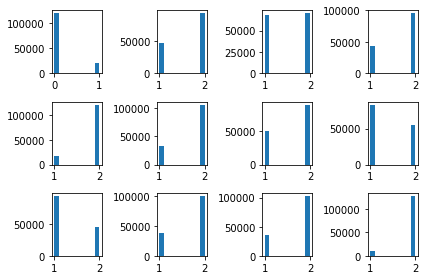

In [33]:
fig, axs = plt.subplots(3,4)
#plt.title("Different chronic diseases distibution counts")
axs[0, 0].hist(x ='RenalDiseaseIndicator', data = Beneficiary)
axs[0, 1].hist(x ='ChronicCond_Alzheimer', data = Beneficiary)
axs[0, 2].hist(x ='ChronicCond_Heartfailure', data = Beneficiary)
axs[0, 3].hist(x ='ChronicCond_KidneyDisease', data = Beneficiary)
axs[1, 0].hist(x ='ChronicCond_Cancer', data = Beneficiary)
axs[1, 1].hist(x ='ChronicCond_ObstrPulmonary', data = Beneficiary)
axs[1, 2].hist(x ='ChronicCond_Depression', data = Beneficiary)
axs[1, 3].hist(x ='ChronicCond_Diabetes', data = Beneficiary)
axs[2, 0].hist(x ='ChronicCond_IschemicHeart', data = Beneficiary)
axs[2, 1].hist(x ='ChronicCond_Osteoporasis', data = Beneficiary)
axs[2, 2].hist(x ='ChronicCond_rheumatoidarthritis', data = Beneficiary)
axs[2, 3].hist(x ='ChronicCond_stroke', data = Beneficiary)
plt.tight_layout()
plt.show()

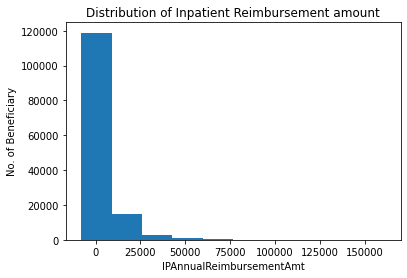

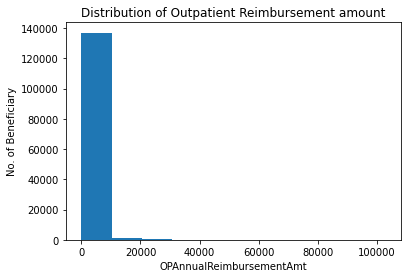

In [34]:
plt.hist(Beneficiary.IPAnnualReimbursementAmt, bins = 10)
plt.title('Distribution of Inpatient Reimbursement amount')
plt.xlabel('IPAnnualReimbursementAmt')
plt.ylabel('No. of Beneficiary')
plt.show()

plt.hist(Beneficiary.OPAnnualReimbursementAmt, bins = 10)
plt.title('Distribution of Outpatient Reimbursement amount')
plt.xlabel('OPAnnualReimbursementAmt')
plt.ylabel('No. of Beneficiary')
plt.show()

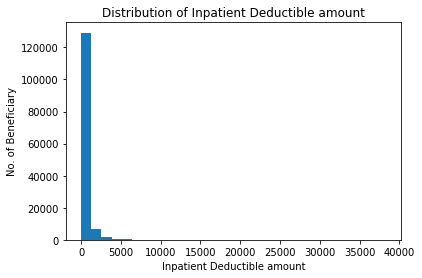

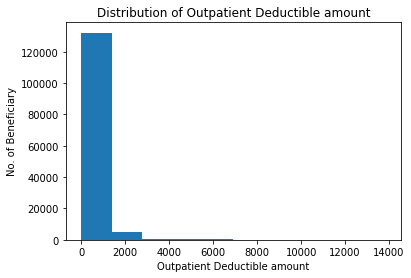

In [35]:
plt.hist(Beneficiary.IPAnnualDeductibleAmt, bins = 30)
plt.title('Distribution of Inpatient Deductible amount')
plt.xlabel('Inpatient Deductible amount')
plt.ylabel('No. of Beneficiary')
plt.show()

plt.hist(Beneficiary.OPAnnualDeductibleAmt, bins = 10)
plt.title('Distribution of Outpatient Deductible amount')
plt.xlabel('Outpatient Deductible amount')
plt.ylabel('No. of Beneficiary')
plt.show()

**let us see the relation between 'IPAnnualReimbursementAmt', 'IPAnnualDeductibleAmt', 'OPAnnualReimbursementAmt','OPAnnualDeductibleAmt'**

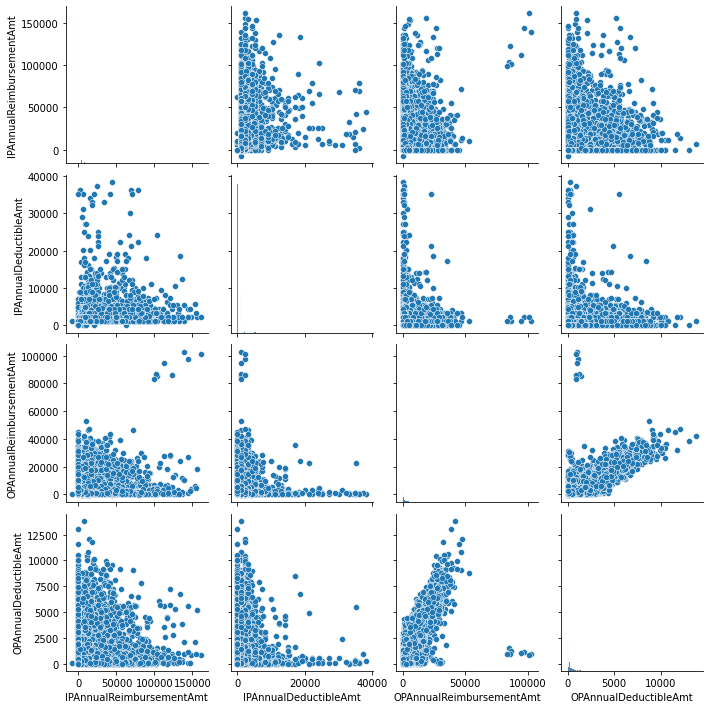

In [36]:
Beneficiary2= Beneficiary[['IPAnnualReimbursementAmt', 'IPAnnualDeductibleAmt', 'OPAnnualReimbursementAmt','OPAnnualDeductibleAmt']]
sns.pairplot(Beneficiary2)
plt.show()

**It shows thare is +ve correlation between OPAnnualReimbursementAmt' and'OPAnnualDeductibleAmt'.**

In [37]:
Beneficiary.State.nunique()

52

In [38]:
sorted_state = sorted(Beneficiary.State.value_counts().index)
sorted_state

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 49,
 50,
 51,
 52,
 53,
 54]

**State 40 and 48 are missing.**

In [39]:
#Let us see the statewise Beneficiary

States_counts = Beneficiary.State.value_counts(ascending = False)
States_counts

5     12052
10     9771
45     8780
33     8443
39     6055
14     5923
36     5366
23     5293
34     4629
31     4124
11     3892
49     3623
44     3390
22     3306
15     3272
26     3108
50     2793
52     2662
1      2615
21     2570
42     2524
18     2519
3      2395
24     2165
19     1998
37     1926
4      1817
6      1807
16     1746
25     1622
7      1602
38     1468
17     1339
54     1237
51     1212
20      931
28      905
32      895
46      851
29      752
30      732
13      687
27      538
12      484
43      465
41      438
8       415
47      410
35      304
53      295
9       214
2       196
Name: State, dtype: int64

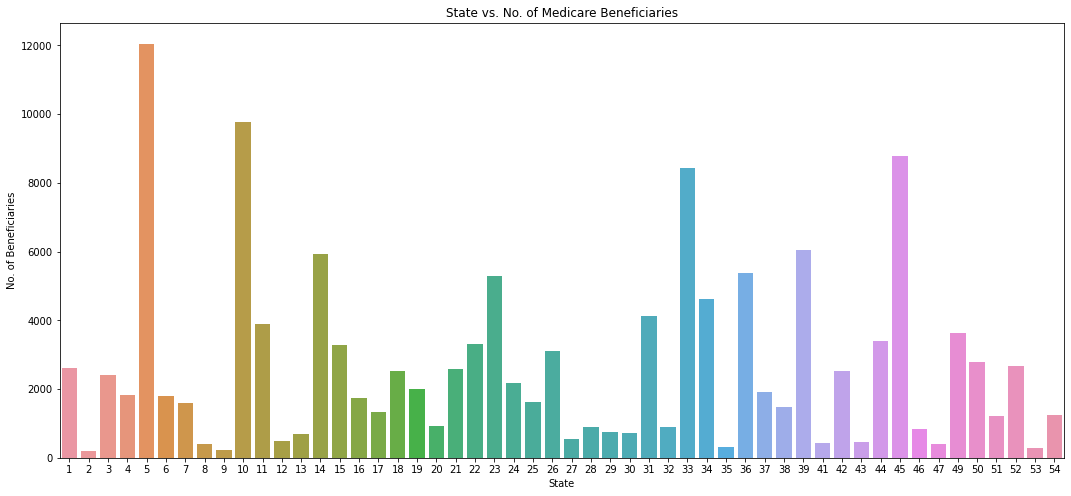

In [40]:
#Let us plot the statewise Beneficiary

plt.figure(figsize = (18, 8))
sns.barplot(x = States_counts.index, y = States_counts.values)
plt.title("State vs. No. of Medicare Beneficiaries")
plt.xlabel("State")
plt.ylabel("No. of Beneficiaries")
plt.show()

In [41]:
#Let us see the countywise beneficiary
Beneficiary_countywise = Beneficiary.County.value_counts()


# Let us take the top 10 counties based on No. of Beneficiaries
Top_10_county = Beneficiary_countywise.index[:10]
Top_10_county_Beneficiaries = Beneficiary_countywise.values[:10]

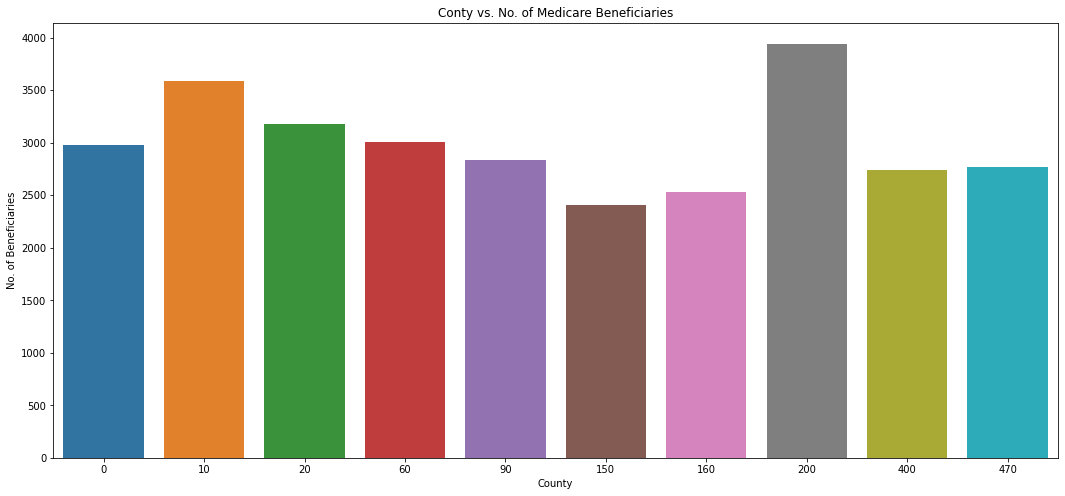

In [42]:
#Let us plot the countywise beneficiary
plt.figure(figsize = (18, 8))
sns.barplot(x = Top_10_county, y = Top_10_county_Beneficiaries)
plt.title("Conty vs. No. of Medicare Beneficiaries")
plt.xlabel("County")
plt.ylabel("No. of Beneficiaries")
plt.show()

In [43]:
Beneficiary_countywise

200    3943
10     3587
20     3176
60     3003
0      2977
       ... 
944       1
742       1
753       1
744       1
521       1
Name: County, Length: 314, dtype: int64

**County-200 has maximum number of beneficiaries (3943), whereas few counties has only 1 beneficiary.** 

In [44]:
#Let us see the Racewise beneficiary

Beneficiary_Racewise = Beneficiary.Race.value_counts()

In [45]:
Beneficiary_Racewise

1    117057
2     13538
3      5059
5      2902
Name: Race, dtype: int64

**The category-4 in Race is missing. Among all the categories, category-1 has maximum number of Beneficiaries.**

In [46]:
# Let us convert the "RenalDiseaseIndicator" from object to integer 
Beneficiary.RenalDiseaseIndicator = Beneficiary.RenalDiseaseIndicator.astype('int64')

In [47]:
Beneficiary.RenalDiseaseIndicator.dtype

dtype('int64')

In [48]:
Beneficiary.RenalDiseaseIndicator.nunique()

2

## Inpatient dataset: Data wrangling and EDA  

In [49]:
Inpatient.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,...,2724,19889,5849,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,NaN,2009-08-31,...,NaN,NaN,NaN,NaN,7092.0,NaN,NaN,NaN,NaN,NaN
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,NaN,PHY324689,2009-09-17,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BENE11011,CLM38412,2009-02-14,2009-02-22,PRV52405,5000,PHY369659,PHY392961,PHY349768,2009-02-14,...,25062,40390,4019,NaN,331.0,NaN,NaN,NaN,NaN,NaN
4,BENE11014,CLM63689,2009-08-13,2009-08-30,PRV56614,10000,PHY379376,PHY398258,NaN,2009-08-13,...,5119,29620,20300,NaN,3893.0,NaN,NaN,NaN,NaN,NaN


In [50]:
Inpatient.shape

(40474, 30)

In [51]:
Inpatient.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40474 entries, 0 to 40473
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   BeneID                  40474 non-null  object 
 1   ClaimID                 40474 non-null  object 
 2   ClaimStartDt            40474 non-null  object 
 3   ClaimEndDt              40474 non-null  object 
 4   Provider                40474 non-null  object 
 5   InscClaimAmtReimbursed  40474 non-null  int64  
 6   AttendingPhysician      40362 non-null  object 
 7   OperatingPhysician      23830 non-null  object 
 8   OtherPhysician          4690 non-null   object 
 9   AdmissionDt             40474 non-null  object 
 10  ClmAdmitDiagnosisCode   40474 non-null  object 
 11  DeductibleAmtPaid       39575 non-null  float64
 12  DischargeDt             40474 non-null  object 
 13  DiagnosisGroupCode      40474 non-null  object 
 14  ClmDiagnosisCode_1      40474 non-null

In [52]:
Inpatient.isnull().sum().sum()

344003

In [53]:
Inpatient.isnull().sum()

BeneID                        0
ClaimID                       0
ClaimStartDt                  0
ClaimEndDt                    0
Provider                      0
InscClaimAmtReimbursed        0
AttendingPhysician          112
OperatingPhysician        16644
OtherPhysician            35784
AdmissionDt                   0
ClmAdmitDiagnosisCode         0
DeductibleAmtPaid           899
DischargeDt                   0
DiagnosisGroupCode            0
ClmDiagnosisCode_1            0
ClmDiagnosisCode_2          226
ClmDiagnosisCode_3          676
ClmDiagnosisCode_4         1534
ClmDiagnosisCode_5         2894
ClmDiagnosisCode_6         4838
ClmDiagnosisCode_7         7258
ClmDiagnosisCode_8         9942
ClmDiagnosisCode_9        13497
ClmDiagnosisCode_10       36547
ClmProcedureCode_1        17326
ClmProcedureCode_2        35020
ClmProcedureCode_3        39509
ClmProcedureCode_4        40358
ClmProcedureCode_5        40465
ClmProcedureCode_6        40474
dtype: int64

In [54]:
# Convert claimStartDt, ClaimEndDt, AdmissionDt and DischargeDt to timestamp

Inpatient['ClaimStartDt'] = pd.to_datetime(Inpatient['ClaimStartDt'])
Inpatient['ClaimEndDt'] = pd.to_datetime(Inpatient['ClaimEndDt'])
Inpatient['AdmissionDt'] = pd.to_datetime(Inpatient['AdmissionDt'])
Inpatient['DischargeDt'] = pd.to_datetime(Inpatient['DischargeDt'])

In [55]:
Inpatient.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40474 entries, 0 to 40473
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   BeneID                  40474 non-null  object        
 1   ClaimID                 40474 non-null  object        
 2   ClaimStartDt            40474 non-null  datetime64[ns]
 3   ClaimEndDt              40474 non-null  datetime64[ns]
 4   Provider                40474 non-null  object        
 5   InscClaimAmtReimbursed  40474 non-null  int64         
 6   AttendingPhysician      40362 non-null  object        
 7   OperatingPhysician      23830 non-null  object        
 8   OtherPhysician          4690 non-null   object        
 9   AdmissionDt             40474 non-null  datetime64[ns]
 10  ClmAdmitDiagnosisCode   40474 non-null  object        
 11  DeductibleAmtPaid       39575 non-null  float64       
 12  DischargeDt             40474 non-null  dateti

In [56]:
# Define two new columns "claim period" and "duration in hospital"

Inpatient['InpatientClaimPeriod'] = (Inpatient['ClaimEndDt'] - Inpatient['ClaimStartDt']).astype('timedelta64[D]')
Inpatient['DurationInHospital'] = (Inpatient['DischargeDt'] - Inpatient['AdmissionDt']).astype('timedelta64[D]')

In [57]:
# After forming the two new 'InpatientClaimPeriod' and 'DurationInHospital', let us delete the 
# 'ClaimStartDt', 'ClaimEndDt', 'AdmissionDt'  and 'DischargeDt', columns as they are of no use any further

Inpatient.drop(columns = ['ClaimStartDt', 'ClaimEndDt', 'DischargeDt', 'AdmissionDt'], inplace = True)

In [58]:
Inpatient.columns

Index(['BeneID', 'ClaimID', 'Provider', 'InscClaimAmtReimbursed',
       'AttendingPhysician', 'OperatingPhysician', 'OtherPhysician',
       'ClmAdmitDiagnosisCode', 'DeductibleAmtPaid', 'DiagnosisGroupCode',
       'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3',
       'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6',
       'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9',
       'ClmDiagnosisCode_10', 'ClmProcedureCode_1', 'ClmProcedureCode_2',
       'ClmProcedureCode_3', 'ClmProcedureCode_4', 'ClmProcedureCode_5',
       'ClmProcedureCode_6', 'InpatientClaimPeriod', 'DurationInHospital'],
      dtype='object')

In [59]:
# Let us see the statistics of four numerical columns

Inpatient[['InscClaimAmtReimbursed','DeductibleAmtPaid', 'InpatientClaimPeriod', 'DurationInHospital']].describe()

,InscClaimAmtReimbursed,DeductibleAmtPaid,InpatientClaimPeriod,DurationInHospital
count,40474.000000,39575.0,40474.000000,40474.000000
mean,10087.884074,1068.0,5.660251,5.665168
std,10303.099402,0.0,5.628873,5.638538
min,0.000000,1068.0,0.000000,0.000000
25%,4000.000000,1068.0,2.000000,2.000000
50%,7000.000000,1068.0,4.000000,4.000000
75%,12000.000000,1068.0,7.000000,7.000000
max,125000.000000,1068.0,36.000000,35.000000


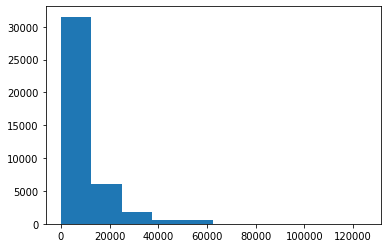

In [60]:
# Plot the Inpatient 'InscClaimAmtReimbursed' distribution

plt.hist(Inpatient['InscClaimAmtReimbursed'], bins = 10)
plt.show()

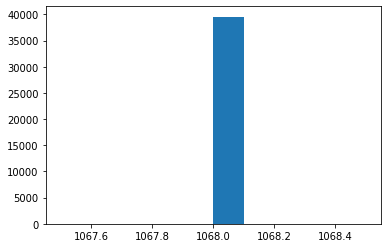

In [61]:
# Plot the 'DeductibleAmtPaid' distribution

plt.hist(Inpatient['DeductibleAmtPaid'], bins = 10)
plt.show()

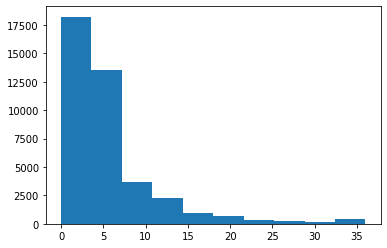

In [62]:
# Plot the 'InpatientClaimPeriod' distribution

plt.hist(Inpatient['InpatientClaimPeriod'], bins = 10)
plt.show()

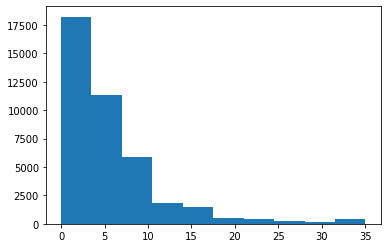

In [63]:
# Plot the 'DurationInHospital' distribution

plt.hist(Inpatient['DurationInHospital'], bins = 10)
plt.show()

In [64]:
Inpatient.columns

Index(['BeneID', 'ClaimID', 'Provider', 'InscClaimAmtReimbursed',
       'AttendingPhysician', 'OperatingPhysician', 'OtherPhysician',
       'ClmAdmitDiagnosisCode', 'DeductibleAmtPaid', 'DiagnosisGroupCode',
       'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3',
       'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6',
       'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9',
       'ClmDiagnosisCode_10', 'ClmProcedureCode_1', 'ClmProcedureCode_2',
       'ClmProcedureCode_3', 'ClmProcedureCode_4', 'ClmProcedureCode_5',
       'ClmProcedureCode_6', 'InpatientClaimPeriod', 'DurationInHospital'],
      dtype='object')

In [65]:
#Let us see the No. of unique values of categorical colums listed in Inpatient
print("Total No. of unique Providers: ", Inpatient.Provider.nunique())

print("\n")

print("Total No. of unique Attending Physicians: ", Inpatient.AttendingPhysician.nunique())
print("Total No. of  unique Operating Physicians: ", Inpatient.OperatingPhysician.nunique())
print("Total No. of  unique Other Physicians: ", Inpatient.OtherPhysician.nunique())

print("\n")

print("Total No. of  Claim Admit Diagnosis Codes: ", Inpatient.AttendingPhysician.nunique())
print("Total No. of  ClmDiagnosisCode_1: ", Inpatient.ClmDiagnosisCode_1.nunique())
print("Total No. of  ClmDiagnosisCode_2: ", Inpatient.ClmDiagnosisCode_2.nunique())
print("Total No. of  ClmDiagnosisCode_3: ", Inpatient.ClmDiagnosisCode_3.nunique())
print("Total No. of  ClmDiagnosisCode_4: ", Inpatient.ClmDiagnosisCode_4.nunique())
print("Total No. of  ClmDiagnosisCode_5: ", Inpatient.ClmDiagnosisCode_5.nunique())
print("Total No. of  ClmDiagnosisCode_6: ", Inpatient.ClmDiagnosisCode_6.nunique())
print("Total No. of  ClmDiagnosisCode_7: ", Inpatient.ClmDiagnosisCode_7.nunique())
print("Total No. of  ClmDiagnosisCode_8: ", Inpatient.ClmDiagnosisCode_8.nunique())
print("Total No. of  ClmDiagnosisCode_9: ", Inpatient.ClmDiagnosisCode_9.nunique())
print("Total No. of  ClmDiagnosisCode_10: ", Inpatient.ClmDiagnosisCode_10.nunique())

print("\n")

print("Total No. of  ClmProcedureCode_1: ", Inpatient.ClmDiagnosisCode_1.nunique())
print("Total No. of  ClmProcedureCode_2: ", Inpatient.ClmDiagnosisCode_2.nunique())
print("Total No. of  ClmProcedureCode_3: ", Inpatient.ClmDiagnosisCode_3.nunique())
print("Total No. of  ClmProcedureCode_4: ", Inpatient.ClmDiagnosisCode_4.nunique())
print("Total No. of  ClmProcedureCode_5: ", Inpatient.ClmDiagnosisCode_5.nunique())
print("Total No. of  ClmProcedureCode_6: ", Inpatient.ClmDiagnosisCode_6.nunique())

Total No. of unique Providers:  2092


Total No. of unique Attending Physicians:  11604
Total No. of  unique Operating Physicians:  8287
Total No. of  unique Other Physicians:  2877


Total No. of  Claim Admit Diagnosis Codes:  11604
Total No. of  ClmDiagnosisCode_1:  2254
Total No. of  ClmDiagnosisCode_2:  2439
Total No. of  ClmDiagnosisCode_3:  2427
Total No. of  ClmDiagnosisCode_4:  2441
Total No. of  ClmDiagnosisCode_5:  2374
Total No. of  ClmDiagnosisCode_6:  2358
Total No. of  ClmDiagnosisCode_7:  2310
Total No. of  ClmDiagnosisCode_8:  2243
Total No. of  ClmDiagnosisCode_9:  2094
Total No. of  ClmDiagnosisCode_10:  952


Total No. of  ClmProcedureCode_1:  2254
Total No. of  ClmProcedureCode_2:  2439
Total No. of  ClmProcedureCode_3:  2427
Total No. of  ClmProcedureCode_4:  2441
Total No. of  ClmProcedureCode_5:  2374
Total No. of  ClmProcedureCode_6:  2358


**In all the Physicians columns, let us replace the entry with Physician 1,
with no entry (which has been generally entered as 0), it'll be 0.**  

In [66]:
Inpatient.replace(regex = r'^PHY', value = 1,  inplace = True)

In [67]:
Inpatient.head()

,BeneID,ClaimID,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmAdmitDiagnosisCode,DeductibleAmtPaid,DiagnosisGroupCode,...,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,InpatientClaimPeriod,DurationInHospital
0,BENE11001,CLM46614,PRV55912,26000,1.0,NaN,NaN,7866,1068.0,201,...,5849,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,6.0
1,BENE11001,CLM66048,PRV55907,5000,1.0,1.0,NaN,6186,1068.0,750,...,NaN,NaN,7092.0,NaN,NaN,NaN,NaN,NaN,2.0,2.0
2,BENE11001,CLM68358,PRV56046,5000,1.0,NaN,1.0,29590,1068.0,883,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,3.0
3,BENE11011,CLM38412,PRV52405,5000,1.0,1.0,1.0,431,1068.0,067,...,4019,NaN,331.0,NaN,NaN,NaN,NaN,NaN,8.0,8.0
4,BENE11014,CLM63689,PRV56614,10000,1.0,1.0,NaN,78321,1068.0,975,...,20300,NaN,3893.0,NaN,NaN,NaN,NaN,NaN,17.0,17.0


In [68]:
Inpatient.replace({'AttendingPhysician': {np.nan: 0}, 'OperatingPhysician': {np.nan: 0}, 'OtherPhysician': {np.nan: 0}}, inplace = True)

**Here one can see that all the diagnosis codes are object, hence we need to convert them to integer.**

In [69]:
diagnosis_columns = ['ClmAdmitDiagnosisCode','DiagnosisGroupCode', 'ClmDiagnosisCode_1',
       'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4',
       'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7',
       'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10']

Inpatient[diagnosis_columns] = Inpatient[diagnosis_columns].apply(pd.to_numeric, errors = 'coerce')
Inpatient.head()

,BeneID,ClaimID,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmAdmitDiagnosisCode,DeductibleAmtPaid,DiagnosisGroupCode,...,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,InpatientClaimPeriod,DurationInHospital
0,BENE11001,CLM46614,PRV55912,26000,1.0,0.0,0.0,7866.0,1068.0,201.0,...,5849.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,6.0
1,BENE11001,CLM66048,PRV55907,5000,1.0,1.0,0.0,6186.0,1068.0,750.0,...,NaN,NaN,7092.0,NaN,NaN,NaN,NaN,NaN,2.0,2.0
2,BENE11001,CLM68358,PRV56046,5000,1.0,0.0,1.0,29590.0,1068.0,883.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,3.0
3,BENE11011,CLM38412,PRV52405,5000,1.0,1.0,1.0,431.0,1068.0,67.0,...,4019.0,NaN,331.0,NaN,NaN,NaN,NaN,NaN,8.0,8.0
4,BENE11014,CLM63689,PRV56614,10000,1.0,1.0,0.0,78321.0,1068.0,975.0,...,20300.0,NaN,3893.0,NaN,NaN,NaN,NaN,NaN,17.0,17.0


**The diagnosis codes and the procedure codes are ambiguos or it is difficult to decide here which are FDA approved and which are not, as there is no list of FDA(U.S. Food and Drug Administration) approved codes. Hence we'll convert the diagnosis?procedure non-zero numerical entries to 1, and NaN values to 0**

In [70]:
# Now write a function to convert the diagnosis/procedure non-zero numerical entries to 1, and NaN values to 0 
def replace_1_0(data, columns):
    for col in columns:
        data.loc[data[col] > 0, col] = 1
        data.replace({col: {np.nan: 0}}, inplace = True)
    return data

In [71]:
# The follwing claims and diagnosis columns needs to be converted to 1 or 0 for further analysis
ColumnsDiagnosisProcedures = ['ClmAdmitDiagnosisCode','DiagnosisGroupCode', 'ClmDiagnosisCode_1',
       'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4',
       'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7',
       'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10',
       'ClmProcedureCode_1', 'ClmProcedureCode_2', 'ClmProcedureCode_3',
       'ClmProcedureCode_4', 'ClmProcedureCode_5', 'ClmProcedureCode_6']

In [72]:
Inpatient = replace_1_0(Inpatient, ColumnsDiagnosisProcedures)

In [73]:
Inpatient.head()

,BeneID,ClaimID,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmAdmitDiagnosisCode,DeductibleAmtPaid,DiagnosisGroupCode,...,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,InpatientClaimPeriod,DurationInHospital
0,BENE11001,CLM46614,PRV55912,26000,1.0,0.0,0.0,1.0,1068.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,6.0
1,BENE11001,CLM66048,PRV55907,5000,1.0,1.0,0.0,1.0,1068.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0
2,BENE11001,CLM68358,PRV56046,5000,1.0,0.0,1.0,1.0,1068.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,3.0
3,BENE11011,CLM38412,PRV52405,5000,1.0,1.0,1.0,1.0,1068.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,8.0,8.0
4,BENE11014,CLM63689,PRV56614,10000,1.0,1.0,0.0,1.0,1068.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,17.0,17.0


In [74]:
Inpatient.AttendingPhysician.nunique()

2

In [75]:
Inpatient.ClmAdmitDiagnosisCode.nunique()

2

In [76]:
### Imputing missing values
Inpatient.DeductibleAmtPaid.median()
Inpatient.replace({'DeductibleAmtPaid': {np.nan: 1068}}, inplace = True)
Inpatient.isnull().sum().sum()

0

## Outpatient dataset: Data wrangling and EDA  

In [77]:
Outpatient.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,...,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,DeductibleAmtPaid,ClmAdmitDiagnosisCode
0,BENE11002,CLM624349,2009-10-11,2009-10-11,PRV56011,30,PHY326117,NaN,NaN,78943,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,56409
1,BENE11003,CLM189947,2009-02-12,2009-02-12,PRV57610,80,PHY362868,NaN,NaN,6115,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,79380
2,BENE11003,CLM438021,2009-06-27,2009-06-27,PRV57595,10,PHY328821,NaN,NaN,2723,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
3,BENE11004,CLM121801,2009-01-06,2009-01-06,PRV56011,40,PHY334319,NaN,NaN,71988,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
4,BENE11004,CLM150998,2009-01-22,2009-01-22,PRV56011,200,PHY403831,NaN,NaN,82382,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,71947


In [78]:
Outpatient.shape

(517737, 27)

In [79]:
Outpatient.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517737 entries, 0 to 517736
Data columns (total 27 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   BeneID                  517737 non-null  object 
 1   ClaimID                 517737 non-null  object 
 2   ClaimStartDt            517737 non-null  object 
 3   ClaimEndDt              517737 non-null  object 
 4   Provider                517737 non-null  object 
 5   InscClaimAmtReimbursed  517737 non-null  int64  
 6   AttendingPhysician      516341 non-null  object 
 7   OperatingPhysician      90617 non-null   object 
 8   OtherPhysician          195046 non-null  object 
 9   ClmDiagnosisCode_1      507284 non-null  object 
 10  ClmDiagnosisCode_2      322357 non-null  object 
 11  ClmDiagnosisCode_3      203257 non-null  object 
 12  ClmDiagnosisCode_4      125596 non-null  object 
 13  ClmDiagnosisCode_5      74344 non-null   object 
 14  ClmDiagnosisCode_6  

In [80]:
Outpatient.isnull().sum().sum()

8093719

In [81]:
Outpatient.isnull().sum()

BeneID                         0
ClaimID                        0
ClaimStartDt                   0
ClaimEndDt                     0
Provider                       0
InscClaimAmtReimbursed         0
AttendingPhysician          1396
OperatingPhysician        427120
OtherPhysician            322691
ClmDiagnosisCode_1         10453
ClmDiagnosisCode_2        195380
ClmDiagnosisCode_3        314480
ClmDiagnosisCode_4        392141
ClmDiagnosisCode_5        443393
ClmDiagnosisCode_6        468981
ClmDiagnosisCode_7        484776
ClmDiagnosisCode_8        494825
ClmDiagnosisCode_9        502899
ClmDiagnosisCode_10       516654
ClmProcedureCode_1        517575
ClmProcedureCode_2        517701
ClmProcedureCode_3        517733
ClmProcedureCode_4        517735
ClmProcedureCode_5        517737
ClmProcedureCode_6        517737
DeductibleAmtPaid              0
ClmAdmitDiagnosisCode     412312
dtype: int64

In [82]:
#Here also we need to convert 'ClaimStartDt' and 'ClaimEndDt' to timestamp
Outpatient['ClaimStartDt'] = pd.to_datetime(Outpatient['ClaimStartDt'])
Outpatient['ClaimEndDt'] = pd.to_datetime(Outpatient['ClaimEndDt'])

In [83]:
Outpatient['OutpatientClaimPeriod'] = (Outpatient['ClaimEndDt'] - Outpatient['ClaimStartDt']).astype('timedelta64[D]')

In [84]:
Outpatient.drop(columns = ['ClaimStartDt', 'ClaimEndDt'], inplace = True)

In [85]:
Outpatient.columns

Index(['BeneID', 'ClaimID', 'Provider', 'InscClaimAmtReimbursed',
       'AttendingPhysician', 'OperatingPhysician', 'OtherPhysician',
       'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3',
       'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6',
       'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9',
       'ClmDiagnosisCode_10', 'ClmProcedureCode_1', 'ClmProcedureCode_2',
       'ClmProcedureCode_3', 'ClmProcedureCode_4', 'ClmProcedureCode_5',
       'ClmProcedureCode_6', 'DeductibleAmtPaid', 'ClmAdmitDiagnosisCode',
       'OutpatientClaimPeriod'],
      dtype='object')

In [86]:
# Get the statistical insight of the numerical columns in Outpatient
Outpatient[['InscClaimAmtReimbursed', 'DeductibleAmtPaid',  'OutpatientClaimPeriod']].describe()

,InscClaimAmtReimbursed,DeductibleAmtPaid,OutpatientClaimPeriod
count,517737.000000,517737.000000,517737.000000
mean,286.334799,2.779233,1.420532
std,694.034343,15.785839,4.707387
min,0.000000,0.000000,0.000000
25%,40.000000,0.000000,0.000000
50%,80.000000,0.000000,0.000000
75%,200.000000,0.000000,0.000000
max,102500.000000,897.000000,23.000000


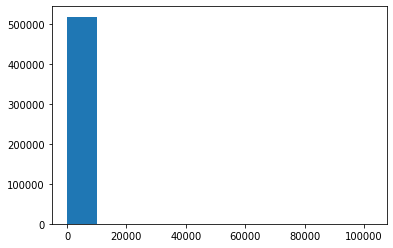

In [87]:
# Plot the distributions of 'InscClaimAmtReimbursed'

plt.hist(Outpatient['InscClaimAmtReimbursed'], bins = 10)
plt.show()



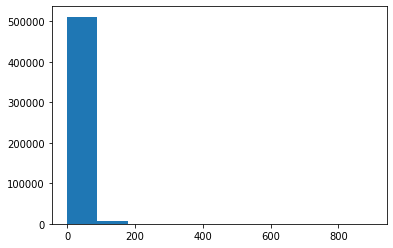

In [88]:
# Plot the distributions of 'DeductibleAmtPaid'

plt.hist(Outpatient['DeductibleAmtPaid'], bins = 10)
plt.show()

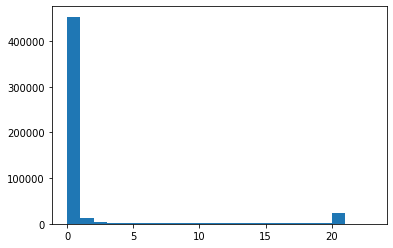

In [89]:
# Plot the distributions of 'OutpatientClaimPeriod'

plt.hist(Outpatient['OutpatientClaimPeriod'], bins = 23)
plt.show()

In [90]:
#plt.hist(Outpatient['InscClaimAmtReimbursed'], bins = 30)
#plt.title('Distribution of Outpatient Insurace claim Reimbursed')
#plt.xlabel('Insurance Claim Amount Reimbursed')
#plt.ylabel('Counts')
#plt.show()

In [91]:
Outpatient.columns

Index(['BeneID', 'ClaimID', 'Provider', 'InscClaimAmtReimbursed',
       'AttendingPhysician', 'OperatingPhysician', 'OtherPhysician',
       'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3',
       'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6',
       'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9',
       'ClmDiagnosisCode_10', 'ClmProcedureCode_1', 'ClmProcedureCode_2',
       'ClmProcedureCode_3', 'ClmProcedureCode_4', 'ClmProcedureCode_5',
       'ClmProcedureCode_6', 'DeductibleAmtPaid', 'ClmAdmitDiagnosisCode',
       'OutpatientClaimPeriod'],
      dtype='object')

In [92]:
#Let us see the No. of unique values of categorical colums listed in Outpatient dataframe
print("Total No. of unique Providers: ", Outpatient.Provider.nunique())

print("\n")

print("Total No. of unique Attending Physicians: ", Outpatient.AttendingPhysician.nunique())
print("Total No. of  unique Operating Physicians: ", Outpatient.OperatingPhysician.nunique())
print("Total No. of  unique Other Physicians: ", Outpatient.OtherPhysician.nunique())

print("\n")

print("Total No. of  Claim Admit Diagnosis Codes: ", Outpatient.AttendingPhysician.nunique())
print("Total No. of  ClmDiagnosisCode_1: ", Outpatient.ClmDiagnosisCode_1.nunique())
print("Total No. of  ClmDiagnosisCode_2: ", Outpatient.ClmDiagnosisCode_2.nunique())
print("Total No. of  ClmDiagnosisCode_3: ", Outpatient.ClmDiagnosisCode_3.nunique())
print("Total No. of  ClmDiagnosisCode_4: ", Outpatient.ClmDiagnosisCode_4.nunique())
print("Total No. of  ClmDiagnosisCode_5: ", Outpatient.ClmDiagnosisCode_5.nunique())
print("Total No. of  ClmDiagnosisCode_6: ", Outpatient.ClmDiagnosisCode_6.nunique())
print("Total No. of  ClmDiagnosisCode_7: ", Outpatient.ClmDiagnosisCode_7.nunique())
print("Total No. of  ClmDiagnosisCode_8: ", Outpatient.ClmDiagnosisCode_8.nunique())
print("Total No. of  ClmDiagnosisCode_9: ", Outpatient.ClmDiagnosisCode_9.nunique())
print("Total No. of  ClmDiagnosisCode_10: ", Outpatient.ClmDiagnosisCode_10.nunique())

print("\n")

print("Total No. of  ClmProcedureCode_1: ", Outpatient.ClmDiagnosisCode_1.nunique())
print("Total No. of  ClmProcedureCode_2: ", Outpatient.ClmDiagnosisCode_2.nunique())
print("Total No. of  ClmProcedureCode_3: ", Outpatient.ClmDiagnosisCode_3.nunique())
print("Total No. of  ClmProcedureCode_4: ", Outpatient.ClmDiagnosisCode_4.nunique())
print("Total No. of  ClmProcedureCode_5: ", Outpatient.ClmDiagnosisCode_5.nunique())
print("Total No. of  ClmProcedureCode_6: ", Outpatient.ClmDiagnosisCode_6.nunique())

Total No. of unique Providers:  5012


Total No. of unique Attending Physicians:  74109
Total No. of  unique Operating Physicians:  28532
Total No. of  unique Other Physicians:  44388


Total No. of  Claim Admit Diagnosis Codes:  74109
Total No. of  ClmDiagnosisCode_1:  10354
Total No. of  ClmDiagnosisCode_2:  5056
Total No. of  ClmDiagnosisCode_3:  4448
Total No. of  ClmDiagnosisCode_4:  3925
Total No. of  ClmDiagnosisCode_5:  3412
Total No. of  ClmDiagnosisCode_6:  2968
Total No. of  ClmDiagnosisCode_7:  2635
Total No. of  ClmDiagnosisCode_8:  2260
Total No. of  ClmDiagnosisCode_9:  1894
Total No. of  ClmDiagnosisCode_10:  495


Total No. of  ClmProcedureCode_1:  10354
Total No. of  ClmProcedureCode_2:  5056
Total No. of  ClmProcedureCode_3:  4448
Total No. of  ClmProcedureCode_4:  3925
Total No. of  ClmProcedureCode_5:  3412
Total No. of  ClmProcedureCode_6:  2968


**Like Inpatient, in Outpatient dataset also,  let us replace the entry with Physicians 1,
with no entry (which has been generally entered as 0), it'll be 0.**  

In [93]:
Outpatient.replace(regex = r'^PHY', value = 1,  inplace = True)
Outpatient.replace({'AttendingPhysician': {np.nan: 0}, 'OperatingPhysician': {np.nan: 0}, 'OtherPhysician': {np.nan: 0}}, inplace = True)

In [94]:
Outpatient.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517737 entries, 0 to 517736
Data columns (total 26 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   BeneID                  517737 non-null  object 
 1   ClaimID                 517737 non-null  object 
 2   Provider                517737 non-null  object 
 3   InscClaimAmtReimbursed  517737 non-null  int64  
 4   AttendingPhysician      517737 non-null  float64
 5   OperatingPhysician      517737 non-null  float64
 6   OtherPhysician          517737 non-null  float64
 7   ClmDiagnosisCode_1      507284 non-null  object 
 8   ClmDiagnosisCode_2      322357 non-null  object 
 9   ClmDiagnosisCode_3      203257 non-null  object 
 10  ClmDiagnosisCode_4      125596 non-null  object 
 11  ClmDiagnosisCode_5      74344 non-null   object 
 12  ClmDiagnosisCode_6      48756 non-null   object 
 13  ClmDiagnosisCode_7      32961 non-null   object 
 14  ClmDiagnosisCode_8  

**Like Inpatient dataset, in Outpatient dataset,  all the diagnosis codes are object, hence we need to convert them to integer. Then we'll convert non-zero numerical entry in Diagnosis and procedure codes to 1, all NaN values to zero.**

In [95]:
Outpatient_Diagnosis_cols = ['ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3',
       'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6',
       'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9',
       'ClmDiagnosisCode_10', 'ClmAdmitDiagnosisCode']

Outpatient_DiagnosisProcedure_cols = ['ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3',
       'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6',
       'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9',
       'ClmDiagnosisCode_10', 'ClmProcedureCode_1', 'ClmProcedureCode_2',
       'ClmProcedureCode_3', 'ClmProcedureCode_4', 'ClmProcedureCode_5',
       'ClmProcedureCode_6', 'ClmAdmitDiagnosisCode']

Outpatient[Outpatient_Diagnosis_cols] = Outpatient[Outpatient_Diagnosis_cols].apply(pd.to_numeric, errors = 'coerce')

Outpatient = replace_1_0(Outpatient, Outpatient_DiagnosisProcedure_cols)

Outpatient.head()

,BeneID,ClaimID,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,...,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,DeductibleAmtPaid,ClmAdmitDiagnosisCode,OutpatientClaimPeriod
0,BENE11002,CLM624349,PRV56011,30,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1.0,0.0
1,BENE11003,CLM189947,PRV57610,80,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1.0,0.0
2,BENE11003,CLM438021,PRV57595,10,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0
3,BENE11004,CLM121801,PRV56011,40,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0
4,BENE11004,CLM150998,PRV56011,200,1.0,0.0,0.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1.0,0.0


In [96]:
Outpatient.isnull().sum().sum()

0

## Train dataset: Data wrangling and EDA 

In [97]:
Train.shape

(5410, 2)

In [98]:
Train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5410 entries, 0 to 5409
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Provider        5410 non-null   object
 1   PotentialFraud  5410 non-null   object
dtypes: object(2)
memory usage: 84.7+ KB


In [99]:
Train.Provider.value_counts(ascending = False)

PRV57023    1
PRV53067    1
PRV51708    1
PRV55209    1
PRV51574    1
           ..
PRV52558    1
PRV57679    1
PRV51626    1
PRV51436    1
PRV57321    1
Name: Provider, Length: 5410, dtype: int64

In [100]:
print("Total no. of unique health care providers: ", Train.Provider.nunique())

Total no. of unique health care providers:  5410


In [101]:
Train.PotentialFraud.nunique()

2

In [102]:
Train.PotentialFraud.value_counts()

No     4904
Yes     506
Name: PotentialFraud, dtype: int64

In [103]:
Train.PotentialFraud.value_counts(normalize = True)

No     0.90647
Yes    0.09353
Name: PotentialFraud, dtype: float64

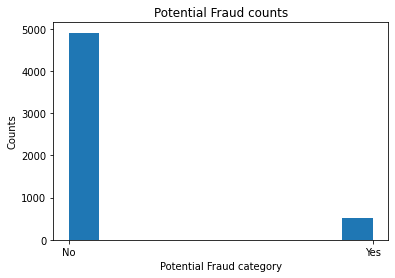

In [104]:
plt.hist(Train.PotentialFraud)
plt.title("Potential Fraud counts")
plt.xlabel('Potential Fraud category')
plt.ylabel('Counts')
plt.show()

# Part-II (Merging Datasets,  Data Wrangling, EDA)

**Now we'll merge the all the dataframes to obtain the insights from the different features in relation to Health care providers and carry out the further EDA and feature engineering.** 

Total No. of unique Providers listed in Inpatient dataset:  2092<br>
Total No. of unique Providers listed in Outpatient dataset:  5012<br>
Total no. of unique health care providers listed in Train dataset:  5410<br><br>

Total No. of records listed in Inpatient dataset:  40474<br>
Total No. of records listed in Outpatient dataset:  517737<br>
Total No. of records listed in Train dataset:  5410

**This implies, keep the providers which are listed in all three datasets.**

### Merge 'Inpatient' and 'Beneficiary' dataframes

In [105]:
# Combine "Inpatient" and "Beneficiary" Datasets joining on BeneID
Inpatient_Beneficiary = Inpatient.merge(Beneficiary, on = 'BeneID', how = 'inner')

In [106]:
Inpatient_Beneficiary.columns

Index(['BeneID', 'ClaimID', 'Provider', 'InscClaimAmtReimbursed',
       'AttendingPhysician', 'OperatingPhysician', 'OtherPhysician',
       'ClmAdmitDiagnosisCode', 'DeductibleAmtPaid', 'DiagnosisGroupCode',
       'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3',
       'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6',
       'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9',
       'ClmDiagnosisCode_10', 'ClmProcedureCode_1', 'ClmProcedureCode_2',
       'ClmProcedureCode_3', 'ClmProcedureCode_4', 'ClmProcedureCode_5',
       'ClmProcedureCode_6', 'InpatientClaimPeriod', 'DurationInHospital',
       'Gender', 'Race', 'RenalDiseaseIndicator', 'State', 'County',
       'NoOfMonths_PartACov', 'NoOfMonths_PartBCov', 'ChronicCond_Alzheimer',
       'ChronicCond_Heartfailure', 'ChronicCond_KidneyDisease',
       'ChronicCond_Cancer', 'ChronicCond_ObstrPulmonary',
       'ChronicCond_Depression', 'ChronicCond_Diabetes',
       'ChronicCond_Is

In [107]:
# Apply groupby on numerical data
Inpatient_Beneficiary_group_numeric = Inpatient_Beneficiary.groupby('Provider').mean()

In [108]:
Inpatient_Beneficiary_group_numeric.head()

,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmAdmitDiagnosisCode,DeductibleAmtPaid,DiagnosisGroupCode,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,...,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
Provider,,,,,,,,,,,,,,,,,,,,,
PRV51001,19400.000000,1.0,0.400000,0.2,1.000000,1068.0,1.0,1.000000,1.000000,1.000000,...,1.200000,1.200000,1.200000,2.000000,1.400000,1.600000,77902.000000,2563.200000,1350.000000,236.00000
PRV51003,9241.935484,1.0,0.645161,0.0,0.967742,1068.0,1.0,0.983871,0.919355,0.854839,...,1.596774,1.209677,1.112903,1.790323,1.693548,1.887097,12696.612903,1604.064516,2217.741935,724.83871
PRV51007,6333.333333,1.0,0.333333,0.0,1.000000,1068.0,1.0,1.000000,1.000000,1.000000,...,1.333333,1.000000,1.000000,2.000000,1.666667,1.333333,11710.000000,2136.000000,2413.333333,470.00000
PRV51008,12500.000000,1.0,1.000000,0.0,1.000000,1068.0,1.0,1.000000,1.000000,0.500000,...,2.000000,1.500000,1.000000,2.000000,2.000000,2.000000,18750.000000,1602.000000,320.000000,165.00000
PRV51011,5000.000000,1.0,0.000000,0.0,1.000000,1068.0,1.0,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,5000.000000,1068.000000,590.000000,90.00000


In [109]:
Inpatient_Beneficiary_group_numeric.columns

Index(['InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'ClmAdmitDiagnosisCode', 'DeductibleAmtPaid',
       'DiagnosisGroupCode', 'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2',
       'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5',
       'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8',
       'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10', 'ClmProcedureCode_1',
       'ClmProcedureCode_2', 'ClmProcedureCode_3', 'ClmProcedureCode_4',
       'ClmProcedureCode_5', 'ClmProcedureCode_6', 'InpatientClaimPeriod',
       'DurationInHospital', 'Gender', 'Race', 'RenalDiseaseIndicator',
       'State', 'County', 'NoOfMonths_PartACov', 'NoOfMonths_PartBCov',
       'ChronicCond_Alzheimer', 'ChronicCond_Heartfailure',
       'ChronicCond_KidneyDisease', 'ChronicCond_Cancer',
       'ChronicCond_ObstrPulmonary', 'ChronicCond_Depression',
       'ChronicCond_Diabetes', 'ChronicCond_IschemicHeart',
       'ChronicCond_Osteop

In [110]:
# In the 'Inpatient_Beneficiary_group_numeric' dataframe, there are many columns which are categorical,
# hence taking the sum() of them should not be appropriate.So,take only numerical columns.
Inpatient_Beneficiary_group_numeric2 = Inpatient_Beneficiary_group_numeric[['InscClaimAmtReimbursed', 'DeductibleAmtPaid', 'InpatientClaimPeriod',
      'DurationInHospital', 'NoOfMonths_PartACov', 'NoOfMonths_PartBCov', 'IPAnnualReimbursementAmt', 'IPAnnualDeductibleAmt',
       'OPAnnualReimbursementAmt', 'OPAnnualDeductibleAmt', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'DiagnosisGroupCode', 'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2',
       'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5',
       'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8',
       'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10', 'ClmProcedureCode_1',
       'ClmProcedureCode_2', 'ClmProcedureCode_3', 'ClmProcedureCode_4',
       'ClmProcedureCode_5', 'ClmProcedureCode_6']]

In [111]:
Inpatient_Beneficiary_group_numeric2.reset_index(inplace = True)

In [112]:
Inpatient_Beneficiary_group_numeric2.head()

,Provider,InscClaimAmtReimbursed,DeductibleAmtPaid,InpatientClaimPeriod,DurationInHospital,NoOfMonths_PartACov,NoOfMonths_PartBCov,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,...,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6
0,PRV51001,19400.000000,1068.0,5.000000,5.000000,12.000000,12.000000,77902.000000,2563.200000,1350.000000,...,0.600000,0.400000,0.200000,0.000000,0.400000,0.200000,0.0,0.0,0.0,0.0
1,PRV51003,9241.935484,1068.0,5.161290,5.161290,11.806452,11.806452,12696.612903,1604.064516,2217.741935,...,0.790323,0.661290,0.612903,0.048387,0.629032,0.145161,0.0,0.0,0.0,0.0
2,PRV51007,6333.333333,1068.0,5.333333,5.333333,12.000000,12.000000,11710.000000,2136.000000,2413.333333,...,0.333333,0.333333,0.333333,0.000000,0.333333,0.000000,0.0,0.0,0.0,0.0
3,PRV51008,12500.000000,1068.0,4.000000,4.000000,12.000000,12.000000,18750.000000,1602.000000,320.000000,...,0.500000,0.500000,0.500000,0.000000,1.000000,0.000000,0.0,0.0,0.0,0.0
4,PRV51011,5000.000000,1068.0,5.000000,5.000000,12.000000,12.000000,5000.000000,1068.000000,590.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0


In [113]:
Inpatient_Beneficiary_group_numeric2.shape

(2092, 31)

In [114]:
# Apply groupby on categorical data
Inpatient_Beneficiary_group_categorical = Inpatient_Beneficiary.groupby('Provider').count()

In [115]:
Inpatient_Beneficiary_group_categorical.head()

,BeneID,ClaimID,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmAdmitDiagnosisCode,DeductibleAmtPaid,DiagnosisGroupCode,ClmDiagnosisCode_1,...,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
Provider,,,,,,,,,,,,,,,,,,,,,
PRV51001,5,5,5,5,5,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
PRV51003,62,62,62,62,62,62,62,62,62,62,...,62,62,62,62,62,62,62,62,62,62
PRV51007,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
PRV51008,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
PRV51011,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [116]:
Inpatient_Beneficiary_group_categorical.columns

Index(['BeneID', 'ClaimID', 'InscClaimAmtReimbursed', 'AttendingPhysician',
       'OperatingPhysician', 'OtherPhysician', 'ClmAdmitDiagnosisCode',
       'DeductibleAmtPaid', 'DiagnosisGroupCode', 'ClmDiagnosisCode_1',
       'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4',
       'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7',
       'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10',
       'ClmProcedureCode_1', 'ClmProcedureCode_2', 'ClmProcedureCode_3',
       'ClmProcedureCode_4', 'ClmProcedureCode_5', 'ClmProcedureCode_6',
       'InpatientClaimPeriod', 'DurationInHospital', 'Gender', 'Race',
       'RenalDiseaseIndicator', 'State', 'County', 'NoOfMonths_PartACov',
       'NoOfMonths_PartBCov', 'ChronicCond_Alzheimer',
       'ChronicCond_Heartfailure', 'ChronicCond_KidneyDisease',
       'ChronicCond_Cancer', 'ChronicCond_ObstrPulmonary',
       'ChronicCond_Depression', 'ChronicCond_Diabetes',
       'ChronicCond_IschemicHeart'

In [117]:
# From Inpatient_Beneficiary_group_categorical, only keep the categorical columns
Inpatient_Beneficiary_group_categorical2 = Inpatient_Beneficiary_group_categorical[['BeneID', 'ClaimID',  
       'Gender', 'Race',
       'RenalDiseaseIndicator', 'State', 'County', 
        'ChronicCond_Alzheimer',
       'ChronicCond_Heartfailure', 'ChronicCond_KidneyDisease',
       'ChronicCond_Cancer', 'ChronicCond_ObstrPulmonary',
       'ChronicCond_Depression', 'ChronicCond_Diabetes',
       'ChronicCond_IschemicHeart', 'ChronicCond_Osteoporasis',
       'ChronicCond_rheumatoidarthritis', 'ChronicCond_stroke']]

In [118]:
#Inpatient_Beneficiary_group_categorical2 =  Inpatient_Beneficiary_group_categorical[['BeneID']]

In [119]:
Inpatient_Beneficiary_group_categorical2.reset_index(inplace = True)
Inpatient_Beneficiary_group_categorical2.head()

,Provider,BeneID,ClaimID,Gender,Race,RenalDiseaseIndicator,State,County,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke
0,PRV51001,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5
1,PRV51003,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62
2,PRV51007,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
3,PRV51008,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
4,PRV51011,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [120]:
Inpatient_Beneficiary_group_categorical2.shape

(2092, 19)

In [121]:
Inpatient_Beneficiary2 = Inpatient_Beneficiary_group_numeric2.merge(Inpatient_Beneficiary_group_categorical2, on = 'Provider', how = 'inner')

In [122]:
Inpatient_Beneficiary2.head()

,Provider,InscClaimAmtReimbursed,DeductibleAmtPaid,InpatientClaimPeriod,DurationInHospital,NoOfMonths_PartACov,NoOfMonths_PartBCov,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,...,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke
0,PRV51001,19400.000000,1068.0,5.000000,5.000000,12.000000,12.000000,77902.000000,2563.200000,1350.000000,...,5,5,5,5,5,5,5,5,5,5
1,PRV51003,9241.935484,1068.0,5.161290,5.161290,11.806452,11.806452,12696.612903,1604.064516,2217.741935,...,62,62,62,62,62,62,62,62,62,62
2,PRV51007,6333.333333,1068.0,5.333333,5.333333,12.000000,12.000000,11710.000000,2136.000000,2413.333333,...,3,3,3,3,3,3,3,3,3,3
3,PRV51008,12500.000000,1068.0,4.000000,4.000000,12.000000,12.000000,18750.000000,1602.000000,320.000000,...,2,2,2,2,2,2,2,2,2,2
4,PRV51011,5000.000000,1068.0,5.000000,5.000000,12.000000,12.000000,5000.000000,1068.000000,590.000000,...,1,1,1,1,1,1,1,1,1,1


In [123]:
Inpatient_Beneficiary_group_numeric2.shape, Inpatient_Beneficiary_group_categorical2.shape, Inpatient_Beneficiary2.shape

((2092, 31), (2092, 19), (2092, 49))

In [124]:
Inpatient_Beneficiary.columns

Index(['BeneID', 'ClaimID', 'Provider', 'InscClaimAmtReimbursed',
       'AttendingPhysician', 'OperatingPhysician', 'OtherPhysician',
       'ClmAdmitDiagnosisCode', 'DeductibleAmtPaid', 'DiagnosisGroupCode',
       'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3',
       'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6',
       'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9',
       'ClmDiagnosisCode_10', 'ClmProcedureCode_1', 'ClmProcedureCode_2',
       'ClmProcedureCode_3', 'ClmProcedureCode_4', 'ClmProcedureCode_5',
       'ClmProcedureCode_6', 'InpatientClaimPeriod', 'DurationInHospital',
       'Gender', 'Race', 'RenalDiseaseIndicator', 'State', 'County',
       'NoOfMonths_PartACov', 'NoOfMonths_PartBCov', 'ChronicCond_Alzheimer',
       'ChronicCond_Heartfailure', 'ChronicCond_KidneyDisease',
       'ChronicCond_Cancer', 'ChronicCond_ObstrPulmonary',
       'ChronicCond_Depression', 'ChronicCond_Diabetes',
       'ChronicCond_Is

### Merge 'Outpatient' with 'Beneficiary'

In [125]:
Outpatient_Beneficiary = Outpatient.merge(Beneficiary, on = 'BeneID', how = 'inner')

In [126]:
Outpatient_Beneficiary.columns

Index(['BeneID', 'ClaimID', 'Provider', 'InscClaimAmtReimbursed',
       'AttendingPhysician', 'OperatingPhysician', 'OtherPhysician',
       'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3',
       'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6',
       'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9',
       'ClmDiagnosisCode_10', 'ClmProcedureCode_1', 'ClmProcedureCode_2',
       'ClmProcedureCode_3', 'ClmProcedureCode_4', 'ClmProcedureCode_5',
       'ClmProcedureCode_6', 'DeductibleAmtPaid', 'ClmAdmitDiagnosisCode',
       'OutpatientClaimPeriod', 'Gender', 'Race', 'RenalDiseaseIndicator',
       'State', 'County', 'NoOfMonths_PartACov', 'NoOfMonths_PartBCov',
       'ChronicCond_Alzheimer', 'ChronicCond_Heartfailure',
       'ChronicCond_KidneyDisease', 'ChronicCond_Cancer',
       'ChronicCond_ObstrPulmonary', 'ChronicCond_Depression',
       'ChronicCond_Diabetes', 'ChronicCond_IschemicHeart',
       'ChronicCond_Osteoporasis', '

In [127]:
Outpatient_Beneficiary.head(10)

,BeneID,ClaimID,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,...,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
0,BENE11002,CLM624349,PRV56011,30,1.0,0.0,0.0,1.0,0.0,0.0,...,2,2,2,2,2,2,0,0,30,50
1,BENE11003,CLM189947,PRV57610,80,1.0,0.0,0.0,1.0,0.0,0.0,...,2,2,1,2,2,2,0,0,90,40
2,BENE11003,CLM438021,PRV57595,10,1.0,0.0,0.0,1.0,0.0,0.0,...,2,2,1,2,2,2,0,0,90,40
3,BENE11004,CLM121801,PRV56011,40,1.0,0.0,0.0,1.0,0.0,0.0,...,2,1,1,1,1,2,0,0,1810,760
4,BENE11004,CLM150998,PRV56011,200,1.0,0.0,0.0,1.0,1.0,1.0,...,2,1,1,1,1,2,0,0,1810,760
5,BENE11004,CLM173224,PRV56011,20,1.0,0.0,0.0,1.0,0.0,0.0,...,2,1,1,1,1,2,0,0,1810,760
6,BENE11004,CLM224741,PRV56011,40,1.0,0.0,0.0,0.0,1.0,1.0,...,2,1,1,1,1,2,0,0,1810,760
7,BENE11004,CLM252512,PRV56011,200,1.0,0.0,1.0,1.0,1.0,1.0,...,2,1,1,1,1,2,0,0,1810,760
8,BENE11004,CLM322683,PRV56011,60,1.0,0.0,1.0,1.0,1.0,0.0,...,2,1,1,1,1,2,0,0,1810,760
9,BENE11004,CLM339500,PRV56011,500,1.0,0.0,1.0,1.0,0.0,0.0,...,2,1,1,1,1,2,0,0,1810,760


In [128]:
Outpatient_Beneficiary_groupby_numeric = Outpatient_Beneficiary.groupby('Provider').mean()

In [129]:
Outpatient_Beneficiary_groupby_numeric.columns

Index(['InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2',
       'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5',
       'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8',
       'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10', 'ClmProcedureCode_1',
       'ClmProcedureCode_2', 'ClmProcedureCode_3', 'ClmProcedureCode_4',
       'ClmProcedureCode_5', 'ClmProcedureCode_6', 'DeductibleAmtPaid',
       'ClmAdmitDiagnosisCode', 'OutpatientClaimPeriod', 'Gender', 'Race',
       'RenalDiseaseIndicator', 'State', 'County', 'NoOfMonths_PartACov',
       'NoOfMonths_PartBCov', 'ChronicCond_Alzheimer',
       'ChronicCond_Heartfailure', 'ChronicCond_KidneyDisease',
       'ChronicCond_Cancer', 'ChronicCond_ObstrPulmonary',
       'ChronicCond_Depression', 'ChronicCond_Diabetes',
       'ChronicCond_IschemicHeart', 'ChronicCond_Osteoporasis',
       'ChronicCond_rheumatoidarthritis',

In [130]:
Outpatient_Beneficiary_groupby_numeric.head()

,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,...,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
Provider,,,,,,,,,,,,,,,,,,,,,
PRV51001,382.000000,1.000000,0.150000,0.450000,0.800000,0.450000,0.200000,0.150000,0.100000,0.150000,...,1.750000,1.150000,1.050000,1.700000,1.750000,1.800000,2532.000000,480.600000,2931.500000,520.900000
PRV51003,466.714286,1.000000,0.071429,0.357143,0.814286,0.628571,0.314286,0.214286,0.085714,0.057143,...,1.585714,1.271429,1.185714,1.714286,1.728571,1.928571,3025.857143,335.657143,3086.000000,748.000000
PRV51004,350.134228,1.000000,0.181208,0.422819,0.738255,0.476510,0.328859,0.167785,0.140940,0.087248,...,1.577181,1.295302,1.275168,1.671141,1.691275,1.885906,4351.879195,434.953020,2194.899329,622.751678
PRV51005,241.124464,0.998283,0.190558,0.410300,0.800858,0.496137,0.315880,0.204292,0.115021,0.067811,...,1.583691,1.314163,1.231760,1.704721,1.715880,1.893562,3623.991416,379.162232,2109.733906,636.328755
PRV51007,213.188406,1.000000,0.159420,0.376812,0.811594,0.478261,0.275362,0.246377,0.144928,0.101449,...,1.608696,1.333333,1.304348,1.695652,1.695652,1.855072,2673.478261,371.478261,1700.000000,469.710145


In [131]:
# Keep only numeric columns
Outpatient_Beneficiary_groupby_numeric2 = Outpatient_Beneficiary_groupby_numeric[['InscClaimAmtReimbursed', 
        'DeductibleAmtPaid', 'OutpatientClaimPeriod',
       'NoOfMonths_PartACov', 'NoOfMonths_PartBCov', 
       'IPAnnualReimbursementAmt', 'IPAnnualDeductibleAmt',
       'OPAnnualReimbursementAmt', 'OPAnnualDeductibleAmt', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2',
       'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5',
       'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8',
       'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10', 'ClmProcedureCode_1',
       'ClmProcedureCode_2', 'ClmProcedureCode_3', 'ClmProcedureCode_4',
       'ClmProcedureCode_5', 'ClmProcedureCode_6', 'OutpatientClaimPeriod']]

In [132]:
Outpatient_Beneficiary_groupby_numeric2.reset_index(inplace = True)

In [133]:
# Obtain the groupby of categorical columns
Outpatient_Beneficiary_groupby_categorical = Outpatient_Beneficiary.groupby('Provider').count()

In [134]:
Outpatient_Beneficiary_groupby_categorical.head()

,BeneID,ClaimID,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,...,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
Provider,,,,,,,,,,,,,,,,,,,,,
PRV51001,20,20,20,20,20,20,20,20,20,20,...,20,20,20,20,20,20,20,20,20,20
PRV51003,70,70,70,70,70,70,70,70,70,70,...,70,70,70,70,70,70,70,70,70,70
PRV51004,149,149,149,149,149,149,149,149,149,149,...,149,149,149,149,149,149,149,149,149,149
PRV51005,1165,1165,1165,1165,1165,1165,1165,1165,1165,1165,...,1165,1165,1165,1165,1165,1165,1165,1165,1165,1165
PRV51007,69,69,69,69,69,69,69,69,69,69,...,69,69,69,69,69,69,69,69,69,69


In [135]:
#Keep only the categorical columns
Outpatient_Beneficiary_groupby_categorical2 = Outpatient_Beneficiary_groupby_categorical[['BeneID', 'ClaimID', 
       'Gender', 'Race', 'RenalDiseaseIndicator',
       'State', 'County', 'ChronicCond_Alzheimer', 'ChronicCond_Heartfailure',
       'ChronicCond_KidneyDisease', 'ChronicCond_Cancer',
       'ChronicCond_ObstrPulmonary', 'ChronicCond_Depression',
       'ChronicCond_Diabetes', 'ChronicCond_IschemicHeart',
       'ChronicCond_Osteoporasis', 'ChronicCond_rheumatoidarthritis',
       'ChronicCond_stroke']]

In [136]:
#Outpatient_Beneficiary_groupby_categorical2 = Outpatient_Beneficiary_groupby_categorical[['BeneID']]

In [137]:
Outpatient_Beneficiary_groupby_categorical2.reset_index(inplace = True)

In [138]:
Outpatient_Beneficiary2 = Outpatient_Beneficiary_groupby_numeric2.merge(Outpatient_Beneficiary_groupby_categorical2, how = 'inner', on = 'Provider')

In [139]:
Outpatient_Beneficiary2.head()

,Provider,InscClaimAmtReimbursed,DeductibleAmtPaid,OutpatientClaimPeriod,NoOfMonths_PartACov,NoOfMonths_PartBCov,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,...,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke
0,PRV51001,382.000000,0.000000,0.550000,12.000000,12.000000,2532.000000,480.600000,2931.500000,520.900000,...,20,20,20,20,20,20,20,20,20,20
1,PRV51003,466.714286,1.000000,2.357143,11.828571,11.928571,3025.857143,335.657143,3086.000000,748.000000,...,70,70,70,70,70,70,70,70,70,70
2,PRV51004,350.134228,2.080537,1.429530,11.865772,11.959732,4351.879195,434.953020,2194.899329,622.751678,...,149,149,149,149,149,149,149,149,149,149
3,PRV51005,241.124464,3.175966,1.088412,11.907296,11.939914,3623.991416,379.162232,2109.733906,636.328755,...,1165,1165,1165,1165,1165,1165,1165,1165,1165,1165
4,PRV51007,213.188406,0.869565,0.768116,11.826087,11.826087,2673.478261,371.478261,1700.000000,469.710145,...,69,69,69,69,69,69,69,69,69,69


In [140]:
Outpatient_Beneficiary_groupby_numeric2.shape, Outpatient_Beneficiary_groupby_categorical2.shape, Outpatient_Beneficiary2.shape

((5012, 30), (5012, 19), (5012, 48))

In [141]:
Inpatient_Outpatient = Inpatient_Beneficiary2.merge(Outpatient_Beneficiary2, on = 'Provider', how = 'inner')

In [142]:
Inpatient_Outpatient.head()

,Provider,InscClaimAmtReimbursed_x,DeductibleAmtPaid_x,InpatientClaimPeriod,DurationInHospital,NoOfMonths_PartACov_x,NoOfMonths_PartBCov_x,IPAnnualReimbursementAmt_x,IPAnnualDeductibleAmt_x,OPAnnualReimbursementAmt_x,...,ChronicCond_Heartfailure_y,ChronicCond_KidneyDisease_y,ChronicCond_Cancer_y,ChronicCond_ObstrPulmonary_y,ChronicCond_Depression_y,ChronicCond_Diabetes_y,ChronicCond_IschemicHeart_y,ChronicCond_Osteoporasis_y,ChronicCond_rheumatoidarthritis_y,ChronicCond_stroke_y
0,PRV51001,19400.000000,1068.0,5.000000,5.000000,12.000000,12.000000,77902.000000,2563.200000,1350.000000,...,20,20,20,20,20,20,20,20,20,20
1,PRV51003,9241.935484,1068.0,5.161290,5.161290,11.806452,11.806452,12696.612903,1604.064516,2217.741935,...,70,70,70,70,70,70,70,70,70,70
2,PRV51007,6333.333333,1068.0,5.333333,5.333333,12.000000,12.000000,11710.000000,2136.000000,2413.333333,...,69,69,69,69,69,69,69,69,69,69
3,PRV51008,12500.000000,1068.0,4.000000,4.000000,12.000000,12.000000,18750.000000,1602.000000,320.000000,...,41,41,41,41,41,41,41,41,41,41
4,PRV51011,5000.000000,1068.0,5.000000,5.000000,12.000000,12.000000,5000.000000,1068.000000,590.000000,...,57,57,57,57,57,57,57,57,57,57


In [143]:
Inpatient_Outpatient.shape

(1694, 96)

In [144]:
Inpatient_Outpatient_Train= Inpatient_Outpatient.merge(Train, on = 'Provider', how = 'inner')

In [145]:
Inpatient_Outpatient_Train.head()

,Provider,InscClaimAmtReimbursed_x,DeductibleAmtPaid_x,InpatientClaimPeriod,DurationInHospital,NoOfMonths_PartACov_x,NoOfMonths_PartBCov_x,IPAnnualReimbursementAmt_x,IPAnnualDeductibleAmt_x,OPAnnualReimbursementAmt_x,...,ChronicCond_KidneyDisease_y,ChronicCond_Cancer_y,ChronicCond_ObstrPulmonary_y,ChronicCond_Depression_y,ChronicCond_Diabetes_y,ChronicCond_IschemicHeart_y,ChronicCond_Osteoporasis_y,ChronicCond_rheumatoidarthritis_y,ChronicCond_stroke_y,PotentialFraud
0,PRV51001,19400.000000,1068.0,5.000000,5.000000,12.000000,12.000000,77902.000000,2563.200000,1350.000000,...,20,20,20,20,20,20,20,20,20,No
1,PRV51003,9241.935484,1068.0,5.161290,5.161290,11.806452,11.806452,12696.612903,1604.064516,2217.741935,...,70,70,70,70,70,70,70,70,70,Yes
2,PRV51007,6333.333333,1068.0,5.333333,5.333333,12.000000,12.000000,11710.000000,2136.000000,2413.333333,...,69,69,69,69,69,69,69,69,69,No
3,PRV51008,12500.000000,1068.0,4.000000,4.000000,12.000000,12.000000,18750.000000,1602.000000,320.000000,...,41,41,41,41,41,41,41,41,41,No
4,PRV51011,5000.000000,1068.0,5.000000,5.000000,12.000000,12.000000,5000.000000,1068.000000,590.000000,...,57,57,57,57,57,57,57,57,57,No


In [146]:
Inpatient_Outpatient_Train.shape

(1694, 97)

In [147]:
Inpatient_Outpatient_Train.columns

Index(['Provider', 'InscClaimAmtReimbursed_x', 'DeductibleAmtPaid_x',
       'InpatientClaimPeriod', 'DurationInHospital', 'NoOfMonths_PartACov_x',
       'NoOfMonths_PartBCov_x', 'IPAnnualReimbursementAmt_x',
       'IPAnnualDeductibleAmt_x', 'OPAnnualReimbursementAmt_x',
       'OPAnnualDeductibleAmt_x', 'AttendingPhysician_x',
       'OperatingPhysician_x', 'OtherPhysician_x', 'DiagnosisGroupCode',
       'ClmDiagnosisCode_1_x', 'ClmDiagnosisCode_2_x', 'ClmDiagnosisCode_3_x',
       'ClmDiagnosisCode_4_x', 'ClmDiagnosisCode_5_x', 'ClmDiagnosisCode_6_x',
       'ClmDiagnosisCode_7_x', 'ClmDiagnosisCode_8_x', 'ClmDiagnosisCode_9_x',
       'ClmDiagnosisCode_10_x', 'ClmProcedureCode_1_x', 'ClmProcedureCode_2_x',
       'ClmProcedureCode_3_x', 'ClmProcedureCode_4_x', 'ClmProcedureCode_5_x',
       'ClmProcedureCode_6_x', 'BeneID_x', 'ClaimID_x', 'Gender_x', 'Race_x',
       'RenalDiseaseIndicator_x', 'State_x', 'County_x',
       'ChronicCond_Alzheimer_x', 'ChronicCond_Heartfailure_x',


In [148]:
Inpatient_Outpatient_Train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1694 entries, 0 to 1693
Data columns (total 97 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Provider                           1694 non-null   object 
 1   InscClaimAmtReimbursed_x           1694 non-null   float64
 2   DeductibleAmtPaid_x                1694 non-null   float64
 3   InpatientClaimPeriod               1694 non-null   float64
 4   DurationInHospital                 1694 non-null   float64
 5   NoOfMonths_PartACov_x              1694 non-null   float64
 6   NoOfMonths_PartBCov_x              1694 non-null   float64
 7   IPAnnualReimbursementAmt_x         1694 non-null   float64
 8   IPAnnualDeductibleAmt_x            1694 non-null   float64
 9   OPAnnualReimbursementAmt_x         1694 non-null   float64
 10  OPAnnualDeductibleAmt_x            1694 non-null   float64
 11  AttendingPhysician_x               1694 non-null   float

In [149]:
Inpatient_Outpatient_Train.replace({'PotentialFraud': {"Yes": 1, "No": 0}}, inplace = True)

In [150]:
Inpatient_Outpatient_Train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1694 entries, 0 to 1693
Data columns (total 97 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Provider                           1694 non-null   object 
 1   InscClaimAmtReimbursed_x           1694 non-null   float64
 2   DeductibleAmtPaid_x                1694 non-null   float64
 3   InpatientClaimPeriod               1694 non-null   float64
 4   DurationInHospital                 1694 non-null   float64
 5   NoOfMonths_PartACov_x              1694 non-null   float64
 6   NoOfMonths_PartBCov_x              1694 non-null   float64
 7   IPAnnualReimbursementAmt_x         1694 non-null   float64
 8   IPAnnualDeductibleAmt_x            1694 non-null   float64
 9   OPAnnualReimbursementAmt_x         1694 non-null   float64
 10  OPAnnualDeductibleAmt_x            1694 non-null   float64
 11  AttendingPhysician_x               1694 non-null   float

In [151]:
Inpatient_Outpatient_Train.isnull().sum().sum()

0

**Here suffix _x and _y stand for Inpatient and Outpatient respectively.**

# Save final dataset for Feature Engineering 

In [152]:
Inpatient_Outpatient_Train.to_csv('clean_data3.csv')

# Part-III   

Here, I like to prepare the data in a different way for feature engineering and model building to compare the performance of the models in two different types of processed data. The following will be considered while handling the numerical and categorical data: <br> 
Under each provider, for numerical data, we'll take the mean same as discussed earlier, however for categorical data, it'll be handled in the following ways:
<br>1. Categorical data with two values will be converted to binary value, then obtain the fraction of one category out of total.<br> 2. Categorical data with more than two types,  we'll take the mode under each provider and obtain dummies for that column. 

### Merge 'Inpatient' and 'Beneficiary' dataframes and carry out the following on categorical data

**Note: For this part, please follow separate file uploaded at "https://github.com/damayantinaik/Health_care_Fraud_Detection_Medicare/blob/main/Data_Wrangling_and_EDA_submission3_final_part-II.ipynb" <br> cell-112 upto end.**

# Summary

The project was built on 4 datasets: Beneficiary, Inpatient, Outpatient and Train. All are large datsets with rows and columns as follows:<br>
Beneficiary: (138556, 25)<br> Inpatient:(40474, 30)<br> Outpatient: (517737, 27)<br> Train: (5410, 2).<br><br>
To prepare the data for analysis and model building, in this notebook data wrangling and EDA was carried out in all four datasets separately and finally all four are merged.<br>

**Data wrangling:**<br>
During data wrangling, following were carried out:<br>
* Datetime columns were assigned to Timestamp.<br>
* Renal disease Indicator "Y" values were assigned 1.<br>
* 'DOD' column was dropped as its almost all entries are missing.
* In Physicians columns,  missing values were replaced with 0, whereas non-null entries were assigned 1. <br>
* For diagnosis/procedure columns, values were also handled same way as physician column. <br><br>

**Exploratory Data Analysis revealed followings:**<br>
* Mean IPAnnualReimbursementAmt: 3660<br>
* Mean IPAnnualDeductibleAmt: 340<br>
* Mean OPAnnualReimbursementAmt: 1298<br>
* Mean OPAnnualDeductibleAmt: 377<br>
* There are 9.3% Fradulant claims as compared to 90.7% non-fradulant cases.<br>
* State 40 and 48 are missing.State-5 has maximum number of Beneficiaries (total beneficiaries: 12052) , whereas stat2-2 has least (total beneficiaries: 196).
* County-200 has maximum number of beneficiaries (3943), whereas few counties has only 1 beneficiary.<br>
* The category-4 in Race is missing. Among all the categories, category-1 has maximum number of Beneficiaries.<br><br>
**Health care Provider information:**<br>
Total No. of unique Providers listed in Inpatient dataset:  2092<br>
Total No. of unique Providers listed in Outpatient dataset:  5012<br>
Total no. of unique health care providers listed in Train datset:  5410
